In [ ]:
#usiamo scipy.stats per le definizioni di distribuzione esponenziale e binomiale:
from scipy.stats import poisson,binom,expon
#importiamo matplotlib e math:
import matplotlib.pyplot as plt
import math

In [ ]:
#prendiamo il flusso totale al livello del mare al di sopra di 10 GeV (https://www.diva-portal.org/smash/get/diva2:1597287/FULLTEXT01.pdf):
#il flusso integrale è ordine di 10-3 [cm-2 s-1 sr-1]:
I_0=0.001

#va integrato nell'angolo di zenith per i muoni!
#per ora consideriamo un angolo solido totale (2 pigreco, ma ci torneremo...)
#consideriamo un rivelatore a dimensione variabile, per esempio un quadrato di lato l = 10 cm

#scriviamo

omega=2*math.pi
area=100 # in cm^2
hours=1
t_data=hours*3600

muon_rate=I_0*omega*t_data*area

print(" il rate di muoni in "+str(hours)+" ore è: "+str(muon_rate))

 il rate di muoni in 1 ore è: 2261.946710584651


In [ ]:
#al di sopra di 10 GeV i muoni cosmici hanno una disctirbuzione in energia che è un esponenziale decrescente
#Consideriamo per semplicità un esponenziale decrescente con "vita media" 50 GeV:
e1 = expon(scale=50,loc=10) #nota bene: in realtà dovremmo definirla solo al di sopra di 10 GeV, teniamo questa come prima approssimazione
#(1/scale)*  e-((x-loc)/scale) --> scale è l'equivalente di 'tau', la vita media, loc è il punto di partenza

#generiamo ad esempio il numero di muoni cosmici previsto sopra:
energies = e1.rvs(size=int(muon_rate))
print(energies)

[11.61509454 19.50531491 67.36847259 ... 26.86579313 12.01395698
 41.66798216]


In [ ]:
len(energies)

2261

(array([1.82403011e-02, 1.51478362e-02, 1.36802258e-02, 1.09022489e-02,
        9.12015054e-03, 8.49117464e-03, 6.23734433e-03, 5.18905117e-03,
        5.50353912e-03, 4.14075800e-03, 3.35453813e-03, 3.61661142e-03,
        2.56831825e-03, 1.78209838e-03, 1.62485441e-03, 1.20553714e-03,
        8.38634532e-04, 5.76561241e-04, 8.38634532e-04, 6.28975899e-04,
        5.76561241e-04, 8.91049191e-04, 3.66902608e-04, 4.71731924e-04,
        3.14487950e-04, 3.14487950e-04, 2.09658633e-04, 5.24146583e-05,
        6.81390557e-04, 1.57243975e-04, 5.24146583e-05, 1.57243975e-04,
        5.24146583e-05, 1.04829317e-04, 5.24146583e-05, 5.24146583e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.24146583e-05,
        1.04829317e-04, 5.24146583e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.24146583e-05, 0.00000000e+00,
        5.24146583e-05]),
 array([ 10.006588  ,  18.44472708,  2

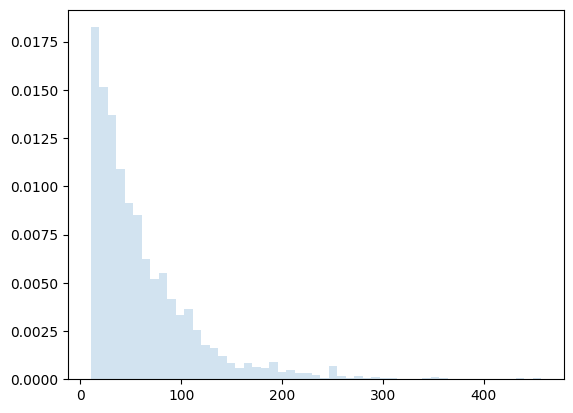

In [ ]:
fig,ax= plt.subplots()
ax.hist(energies, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
#plt.show()

Il numero di conteggi atteso e' pari a  2261


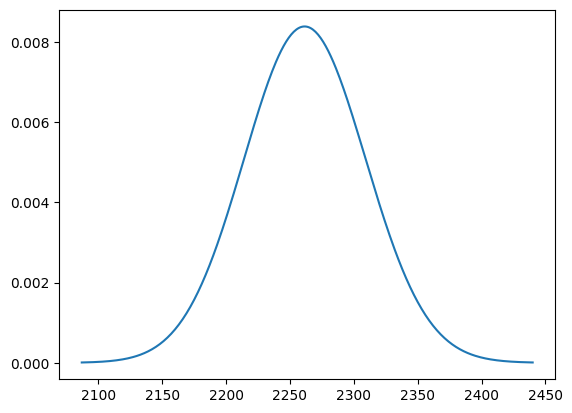

In [ ]:
import numpy as np
muon_prob = poisson(muon_rate)
ndatasets=10000

print("Il numero di conteggi atteso e' pari a ",int(muon_rate))
#x= np.arange(muon_prob.ppf(0.01),muon_prob.ppf(0.99))
x= np.arange(muon_prob.ppf(1.0/ndatasets),muon_prob.ppf(1-1.0/ndatasets))
y=muon_prob.pmf(x)
fig2, axs = plt.subplots()
axs.plot(x,y)

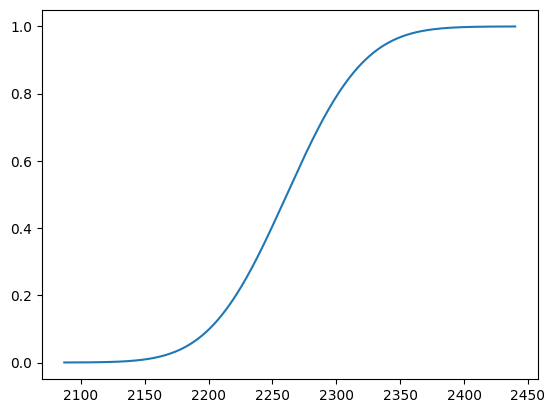

In [ ]:
y = poisson.cdf(x, muon_rate, 0)
plt.plot(x, y)
plt.show()
